In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Exercise 1

In [157]:
#Generate random data points
X,_= make_blobs(n_samples = 300, centers = 4, random_state = 42)

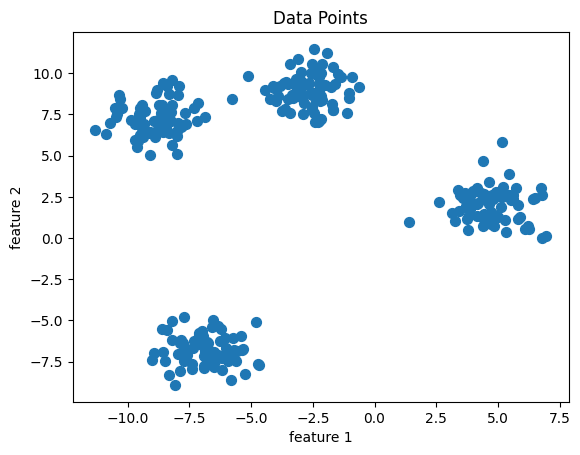

In [158]:
#plot the data points
plt.scatter(X[:,0],X[:,1], s= 50)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Data Points")
plt.show()

In [159]:
#ELBOW
wcss_list=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=50)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)

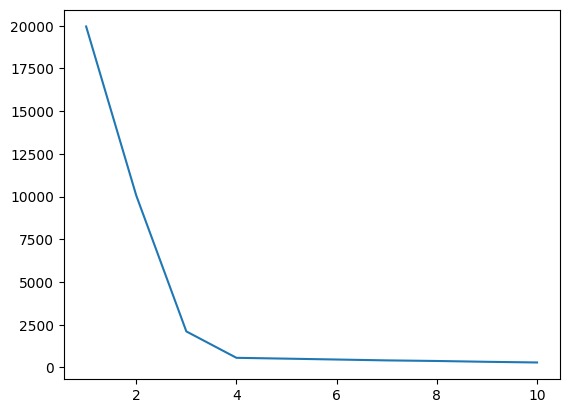

In [160]:
plt.plot(range(1,11),wcss_list)


[]

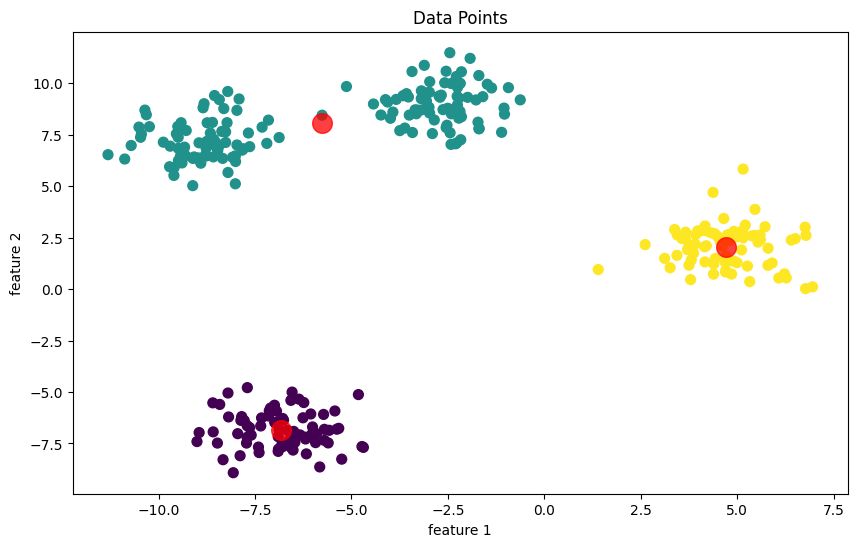

In [161]:
kmeans=KMeans(n_clusters=3, n_init=10,random_state=50)
clusters=kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Data Points")
plt.plot()

[]

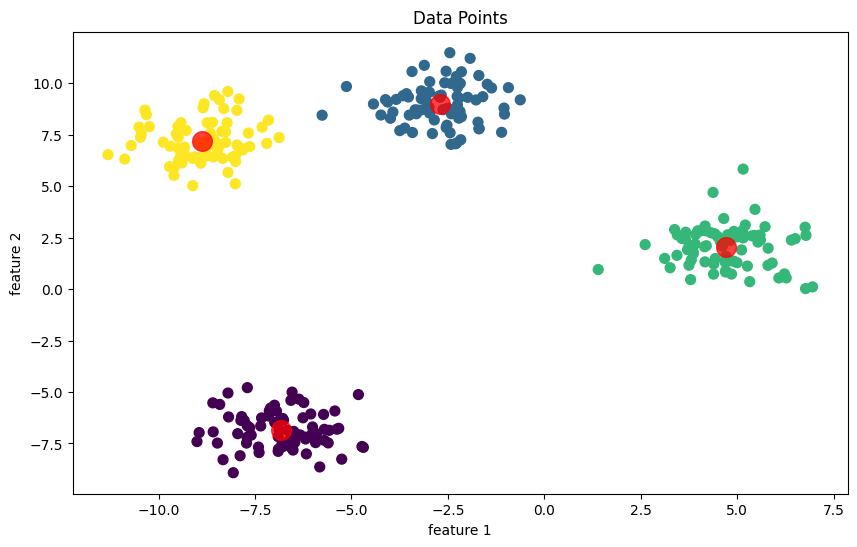

In [162]:
kmeans=KMeans(n_clusters=4, n_init=10,random_state=50)
clusters=kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Data Points")
plt.plot()

# Exercise 2

In [163]:
#loading song features
feats_col_list = [0,1,2,3,4,5,6,7,8]
#only columns with song index and acoustic features will be loaded
feats_df = pd.read_csv(
    'data/echonest.csv',
    usecols = feats_col_list,
    low_memory = False, header = 2
    )
feats_df.rename( columns = {'Unnamed: 0': 'track_id'}, inplace = True)
feats_df.dropna(inplace = True)
feats_df.reset_index(drop = True, inplace = True)

In [164]:
feats_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [165]:
genre_col_list = [0,40]
genre_df = pd.read_csv(
    "data/tracks.csv", 
    usecols = genre_col_list,
    low_memory = False,
    header = 1
    )
genre_df.rename(columns = {'Unnamed: 0': 'track_id'}, inplace = True)
genre_df.dropna(inplace = True)
genre_df.reset_index(drop = True, inplace = True)

In [166]:
genre_df.tail()

,track_id,genre_top
49593,155315,Rock
49594,155316,Rock
49595,155317,Rock
49596,155318,Rock
49597,155319,Rock


In [167]:
#creating a dictionary that will be used to convert word labels into numeric ones
labels_dict = {value: index for index, value in enumerate(genre_df['genre_top'].unique())}

genre_df['genre_numeric_label'] = genre_df['genre_top'].map(labels_dict)
all_data_df = pd.merge(feats_df, genre_df, on = 'track_id', how = 'inner')

In [168]:
all_data_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,genre_numeric_label
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop,0
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop,0
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop,0
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Pop,1
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop,0


In [169]:
x_columns = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]
y_column = "genre_numeric_label"

In [170]:
x = all_data_df[x_columns]
y = all_data_df[y_column]

In [171]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {sum(explained_variance):.2%}")

Explained variance: 99.97%


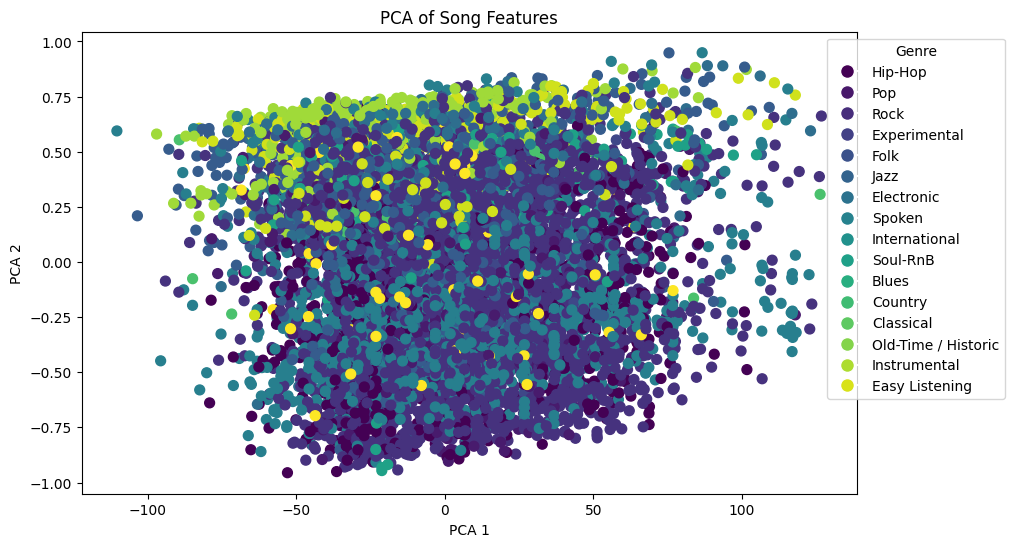

In [172]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y, s = 50, cmap = 'viridis')
plt.legend(
    handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = genre, 
    markerfacecolor = plt.cm.viridis(labels_dict[genre] / len(labels_dict)), markersize = 10) for genre in labels_dict.keys()],
    title = "Genre",
    loc = "upper right",
    bbox_to_anchor=(1.2, 1)
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Song Features")
plt.show()

Its hard to distinguish between music genre clusters

# Exercise 3

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


[]

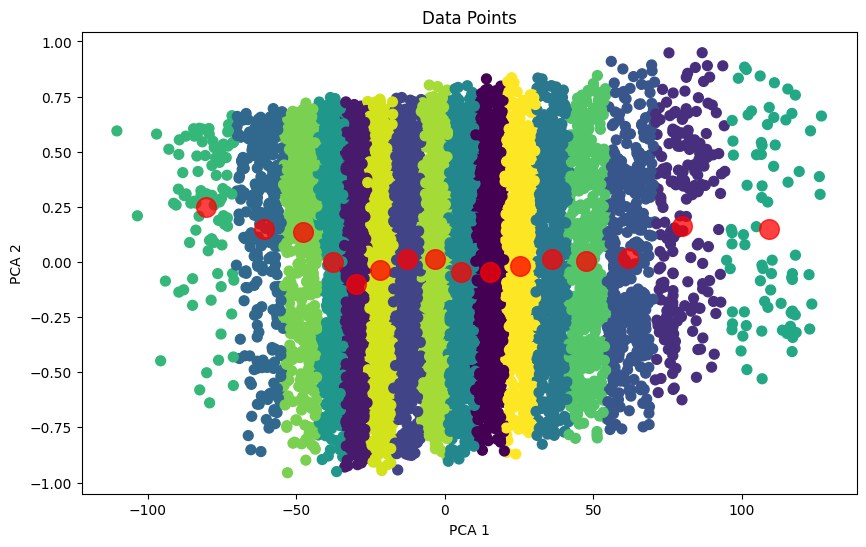

In [173]:
kmeans=KMeans(n_clusters=16, n_init=10,random_state=50)
clusters=kmeans.fit_predict(x)

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
centers = pca.transform(centers)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Data Points")
plt.plot()

The clustering algorithm is not able to distinguish between the genres. The clusters are not well defined and overlap with each other.

# Exercise 4

In [174]:
x.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,1.000000,-0.178454,-0.468920,0.126698,0.060947,0.021417,-0.105590,-0.070763
danceability,-0.178454,1.000000,0.015977,-0.123452,-0.144263,0.188797,-0.105448,0.443607
energy,-0.468920,0.015977,1.000000,-0.003615,0.026049,-0.001357,0.230706,0.186517
instrumentalness,0.126698,-0.123452,-0.003615,1.000000,-0.055617,-0.243555,0.025368,-0.144161
liveness,0.060947,-0.144263,0.026049,-0.055617,1.000000,0.070916,-0.014862,-0.023683
speechiness,0.021417,0.188797,-0.001357,-0.243555,0.070916,1.000000,0.035855,0.113319
tempo,-0.105590,-0.105448,0.230706,0.025368,-0.014862,0.035855,1.000000,0.124182
valence,-0.070763,0.443607,0.186517,-0.144161,-0.023683,0.113319,0.124182,1.000000


## Standardize the data

Explained variance: 40.77%


[]

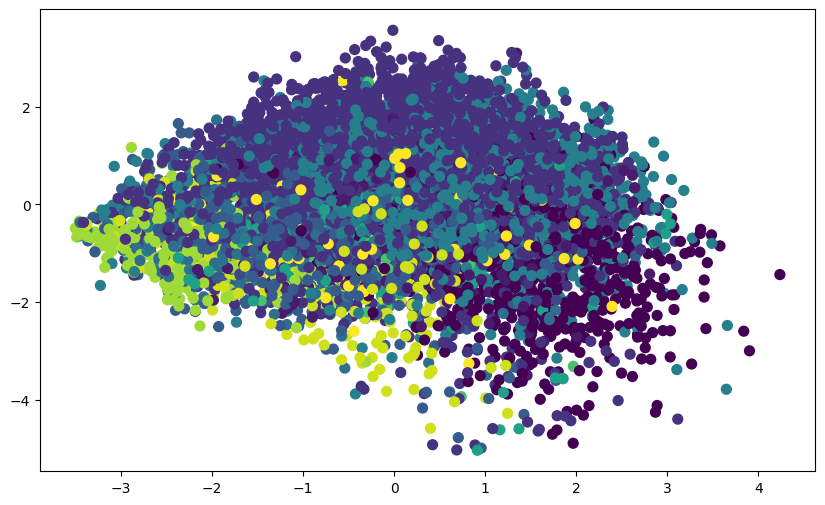

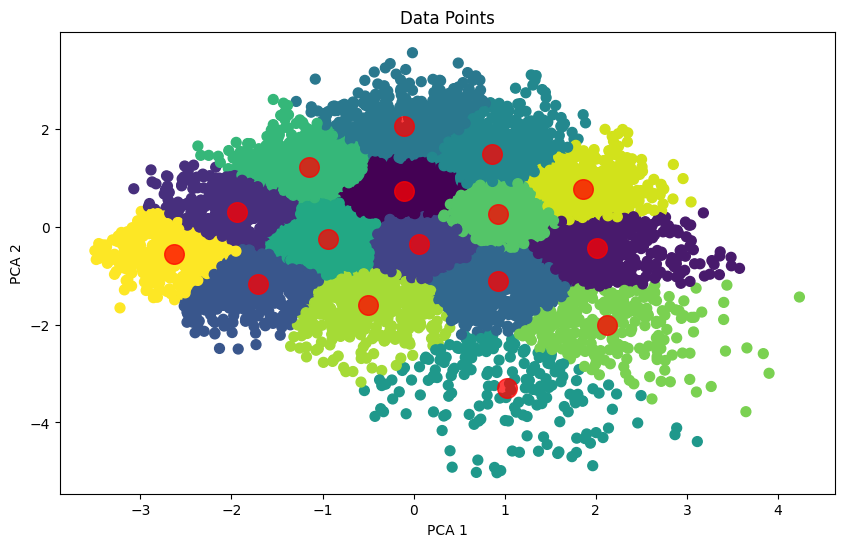

In [175]:
x_stand = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_stand)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {sum(explained_variance):.2%}")
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y, s = 50, cmap = 'viridis')
kmeans=KMeans(n_clusters=16, n_init=10,random_state=50)
clusters=kmeans.fit_predict(x_pca)
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Data Points")
plt.plot()

## Standardize the data and use less clusters

[]

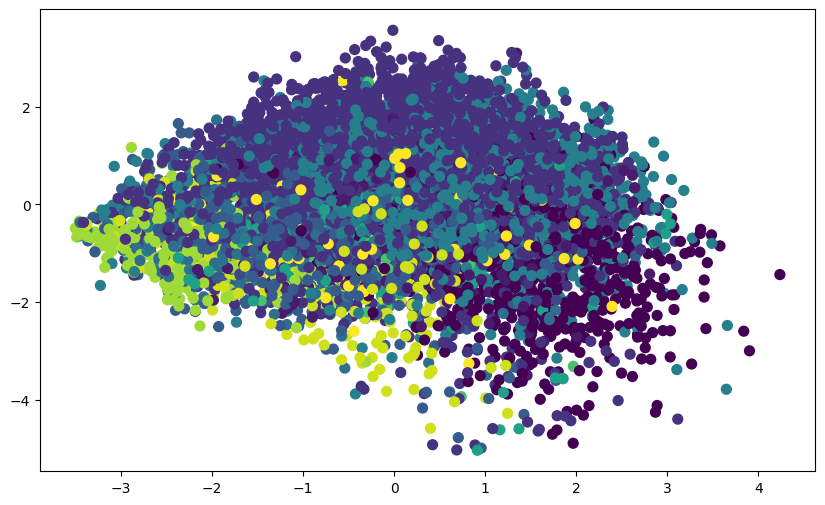

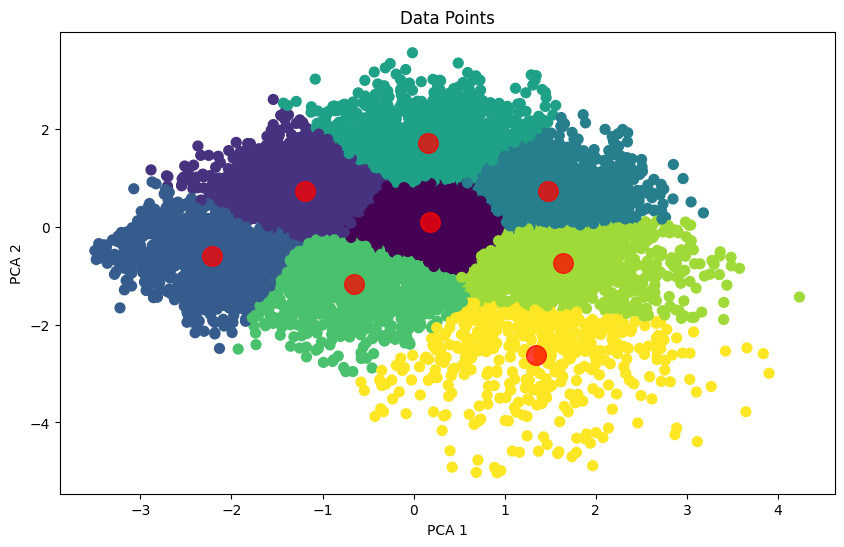

In [176]:
kmeans=KMeans(n_clusters=8, n_init=10,random_state=50)
clusters=kmeans.fit_predict(x_pca)

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y, s = 50, cmap = 'viridis')
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Data Points")
plt.plot()

## Use less features, by dropping 2 the least important features

In [177]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

pca_df = pd.DataFrame(data = pca.components_.T, columns=["PC1", "PC2"], index = x.columns)
pca_df

,PC1,PC2
acousticness,-0.001156,0.820630
danceability,-0.000570,-0.133112
energy,0.001850,-0.400106
instrumentalness,0.000257,0.344782
liveness,-0.000068,0.013646
speechiness,0.000140,-0.026048
tempo,0.999997,0.001694
valence,0.000970,-0.170351


Based on that I will remove danceability, liveness and speechiness

In [178]:
x_dropeed = x.drop(columns = ["liveness", "speechiness", "danceability"])
x_dropeed

,acousticness,energy,instrumentalness,tempo,valence
0,0.416675,0.634476,1.062807e-02,165.922,0.576661
1,0.374408,0.817461,1.851103e-03,126.957,0.269240
2,0.043567,0.701470,6.967990e-04,100.260,0.621661
3,0.951670,0.924525,9.654270e-01,111.562,0.963590
4,0.452217,0.560410,1.944269e-02,114.290,0.894072
...,...,...,...,...,...
9350,0.412194,0.849309,6.000000e-10,96.104,0.692414
9351,0.054973,0.728567,7.215700e-06,96.262,0.399720
9352,0.010478,0.657498,7.098000e-07,94.885,0.432240
9353,0.067906,0.764508,1.625500e-06,171.329,0.580087


Explained variance: 54.81%


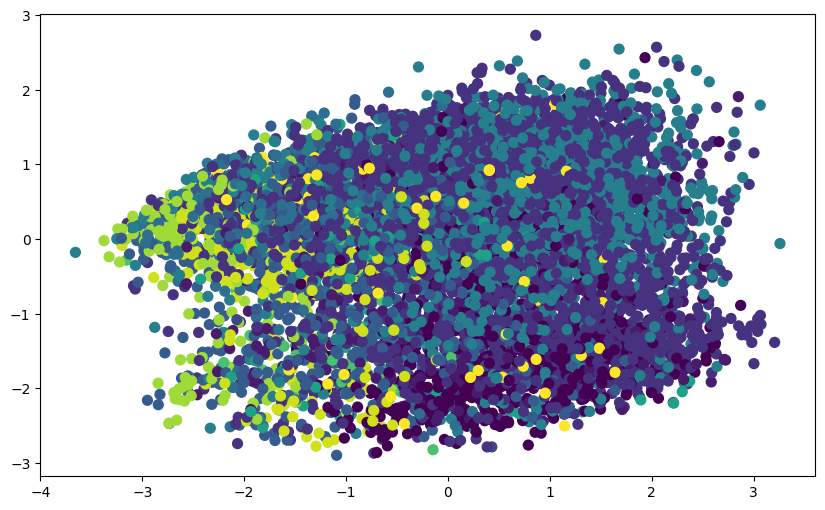

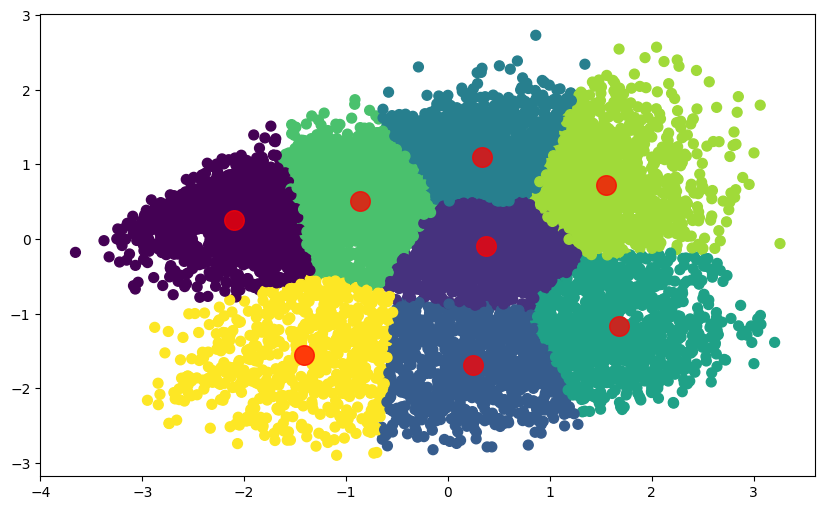

In [179]:
pca = PCA(n_components = 2)
x_stand = StandardScaler().fit_transform(x_dropeed)
x_pca = pca.fit_transform(x_stand)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {sum(explained_variance):.2%}")
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y, s = 50, cmap = 'viridis')
kmeans=KMeans(n_clusters=8, n_init=10,random_state=50)
clusters=kmeans.fit_predict(x_pca)
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=clusters, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='o')

Using less features and less clusters helps for better clustering but due to the nature of the data, it is not possible to get a good clustering. The clusters are still overlapping and not well defined.

# Exercise 5

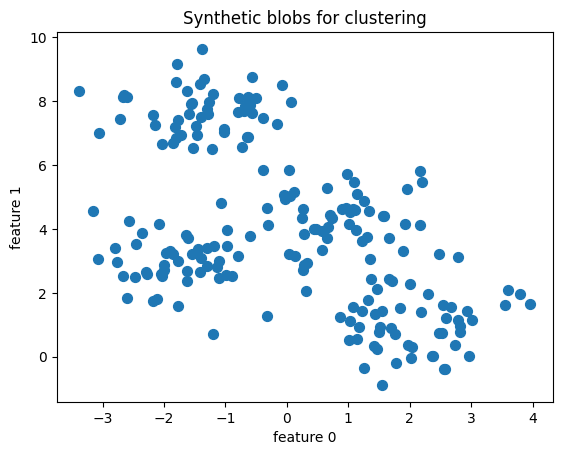

In [180]:
X, y_true = make_blobs(n_samples=200,
                       centers=4,
                       n_features=2,
                       cluster_std=0.8,
                       random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic blobs for clustering")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

In [181]:
clustering = AgglomerativeClustering(n_clusters = 7).fit(X)


7


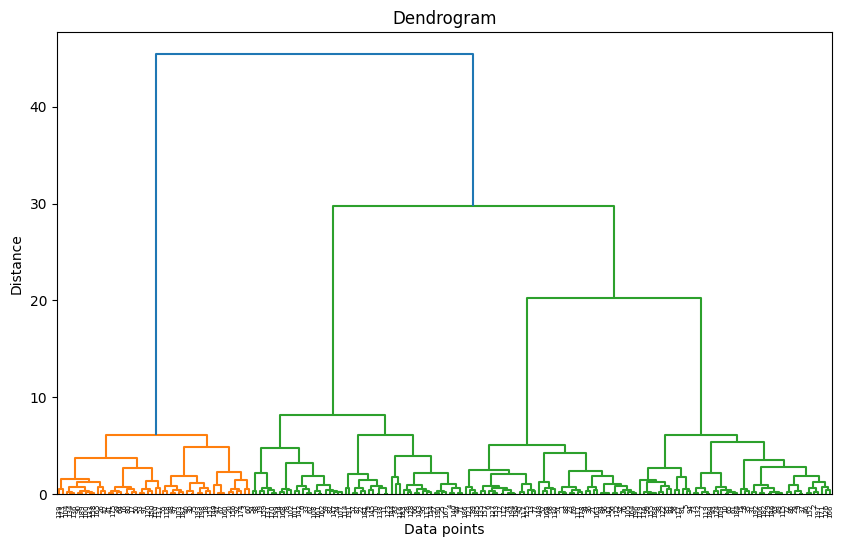

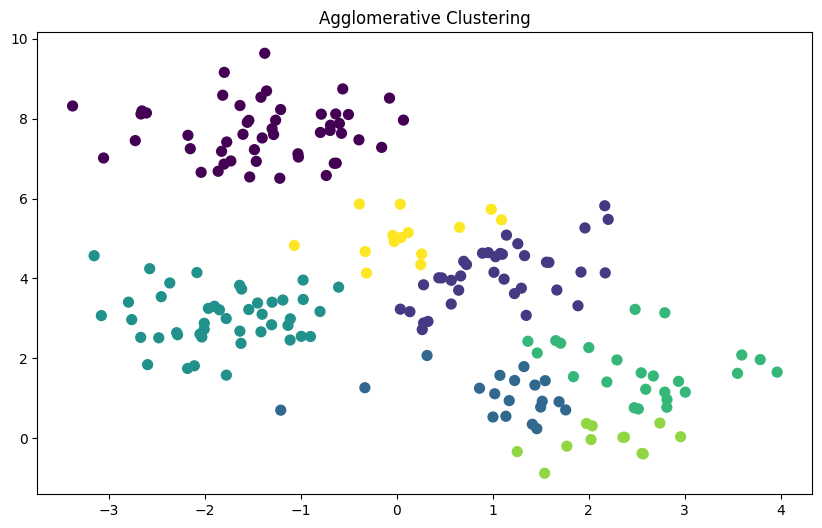

In [182]:
labels = clustering.labels_
print(len(set(labels)))

linked = linkage(X, method = 'ward')
plt.figure(figsize=(10,6))
dendrogram(linked, orientation ='top')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

# Exercise 6

In [183]:
clustering = AgglomerativeClustering(n_clusters = 4).fit(x)
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

4


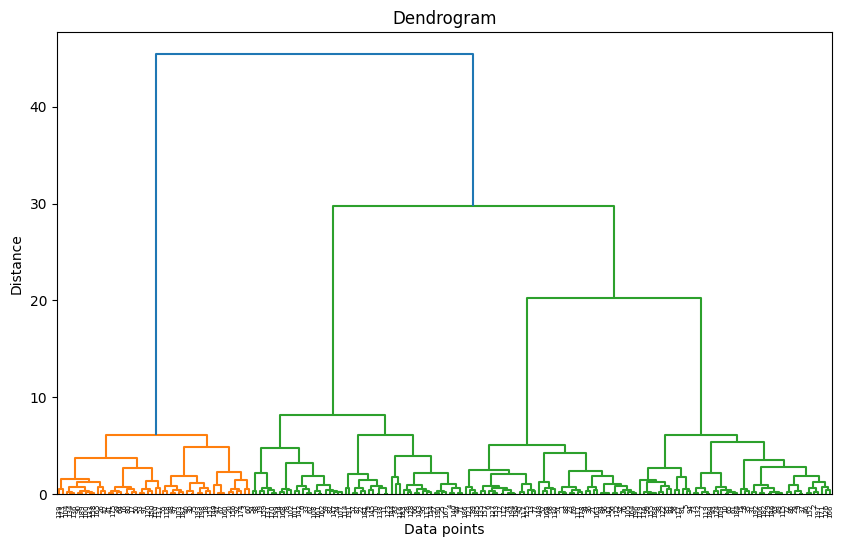

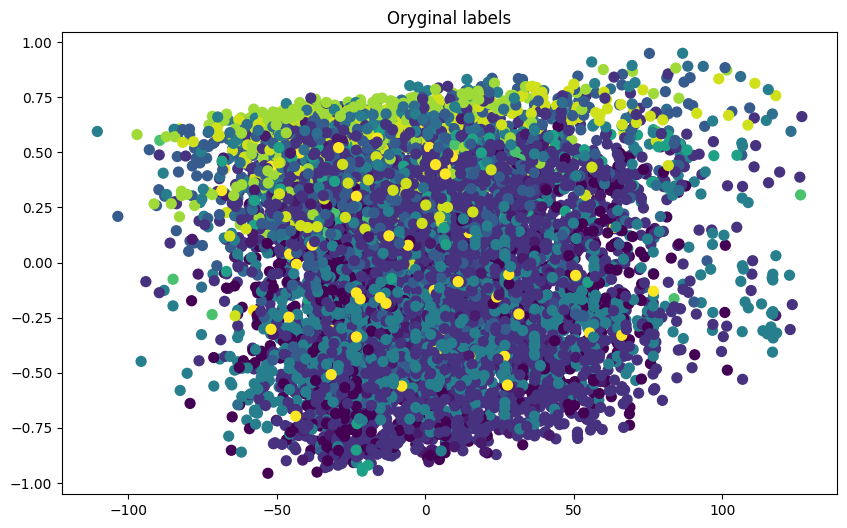

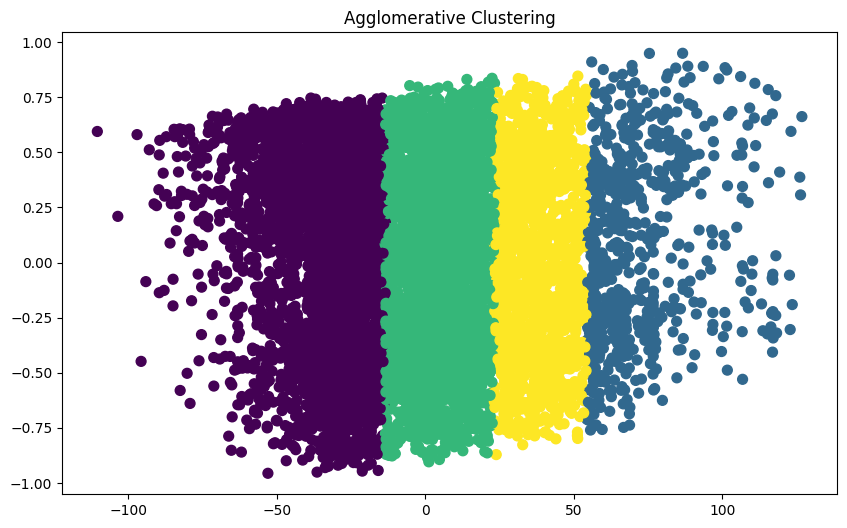

In [184]:
labels = clustering.labels_
print(len(set(labels)))

linked = linkage(X, method = 'ward')
plt.figure(figsize=(10,6))
dendrogram(linked, orientation ='top')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=50, cmap='viridis')
plt.title("Oryginal labels")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

## Check which clusters the tracks from the selected genre have been assigned to


In [185]:
selected_genre = "Hip-Hop"
all_data_df_copy = all_data_df.copy()
all_data_df_copy['cluster'] = labels
selected_genre_df = all_data_df_copy[all_data_df_copy['genre_top'] == selected_genre]
selected_genre_df = selected_genre_df[['track_id', 'genre_numeric_label', 'cluster']]
selected_genre_df

,track_id,genre_numeric_label,cluster
0,2,0,3
1,3,0,2
2,5,0,0
4,134,0,2
194,583,0,1
...,...,...,...
9350,124718,0,0
9351,124719,0,0
9352,124720,0,0
9353,124721,0,3


## Check which genres have been assigned to each of the four clusters

In [186]:
cluster_genre_df = all_data_df_copy.groupby(['cluster', 'genre_top']).size().reset_index(name='counts')
cluster_genre_df = cluster_genre_df.sort_values(by=['cluster', 'counts'], ascending=[True, False])
cluster_genre_df.reset_index(drop=True, inplace=True)
cluster_genre_df

,cluster,genre_top,counts
0,0,Rock,1173
1,0,Electronic,781
2,0,Hip-Hop,532
3,0,Folk,414
4,0,Old-Time / Historic,180
5,0,Classical,168
6,0,Jazz,125
7,0,Pop,114
8,0,International,48
9,0,Blues,37


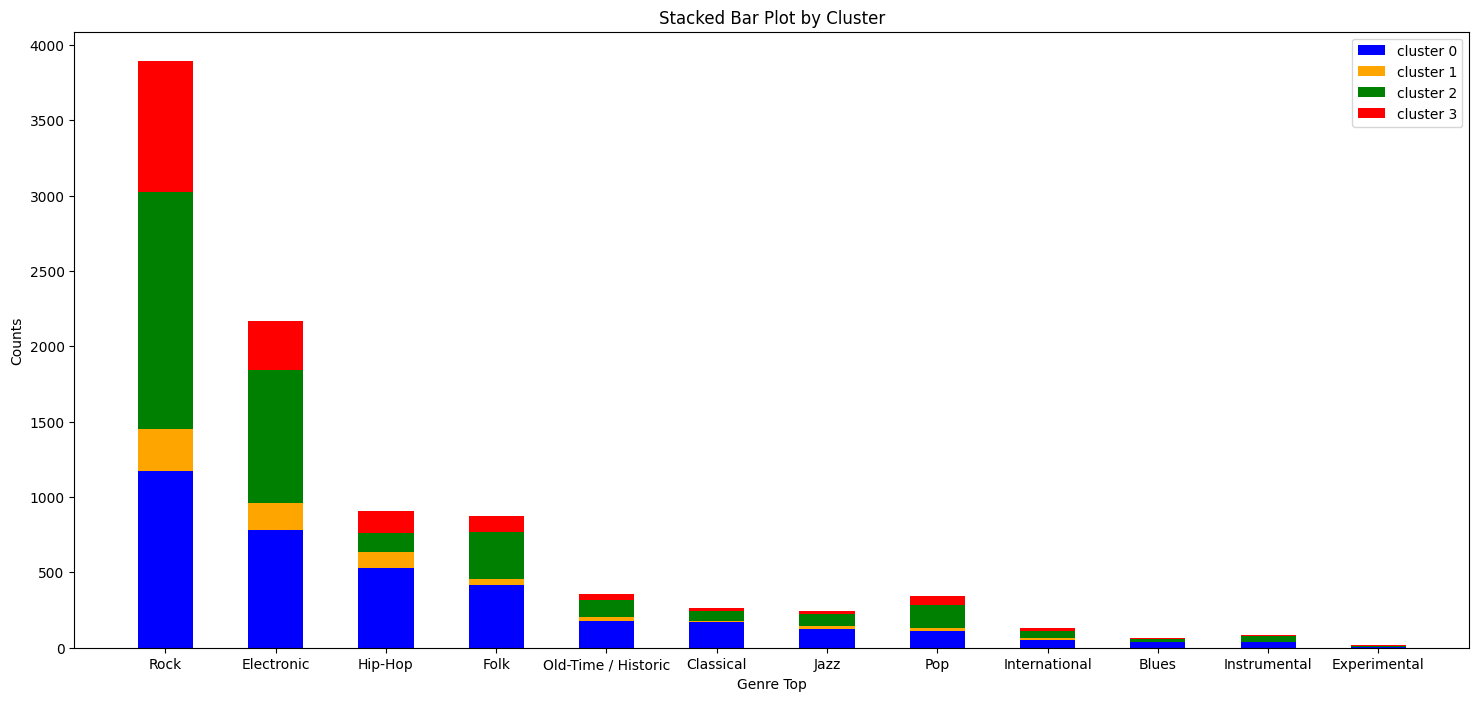

In [192]:
# use it on cluster_genre_df
genres = cluster_genre_df['genre_top'].unique()
data = {
    'genre_top': genres,
    'cluster0': [cluster_genre_df[(cluster_genre_df['genre_top'] == genre) & (cluster_genre_df['cluster'] == 0)]['counts'].values[0] for genre in genres],
    'cluster1': [cluster_genre_df[(cluster_genre_df['genre_top'] == genre) & (cluster_genre_df['cluster'] == 1)]['counts'].values[0] for genre in genres],
    'cluster2': [cluster_genre_df[(cluster_genre_df['genre_top'] == genre) & (cluster_genre_df['cluster'] == 2)]['counts'].values[0] for genre in genres],
    'cluster3': [cluster_genre_df[(cluster_genre_df['genre_top'] == genre) & (cluster_genre_df['cluster'] == 3)]['counts'].values[0] for genre in genres]
}

df = pd.DataFrame(data)

# Set parameters
bar_width = 0.5
x = df['genre_top']

# Plot the first cluster bars
plt.figure(figsize=(18,8))
plt.bar(x, df['cluster0'], width=bar_width, color='blue', label='cluster 0')

# Use the previous bars as 'bottom' for the next cluster
plt.bar(x, df['cluster1'], width=bar_width, color='orange', label='cluster 1', bottom=df['cluster0'])

# Calculate cumulative bottom for the next clusters
bottom_cluster = df['cluster0'] + df['cluster1']
plt.bar(x, df['cluster2'], width=bar_width, color='green', label='cluster 2', bottom=bottom_cluster)

bottom_cluster += df['cluster2']
plt.bar(x, df['cluster3'], width=bar_width, color='red', label='cluster 3', bottom=bottom_cluster)

plt.xlabel('Genre Top')
plt.ylabel('Counts')
plt.title('Stacked Bar Plot by Cluster')
plt.legend(loc='upper right')
plt.show()


It seems that genres have been assigned more or less evenly to the clusters with biggest advantage to the cluster 0 and 2.